In [2]:
import nest_asyncio
nest_asyncio.apply()
import twint
import pandas as pd

In [5]:
c = twint.Config()

c.Search = "Ransomware"
c.Limit = 1000
c.Since = "2022-03-01"
c.Until = "2022-04-07"
c.Lang = "en"
c.Hide_output = True
c.Debug = True
c.Pandas = True

In [6]:
%%time
try:
    print("Mulai Crawling")
    
    #konversi output ke format dataframe
    def twint_to_dataframe(columns):
        return twint.output.panda.Tweets_df[columns]
    
    #Mulai crawling
    twint.run.Search(c)
     
    #Save data crawling
    data = twint_to_dataframe(['tweet'])
    
    
except Exception as e:
    print(e)
print("Selesai")
print("=======")

Mulai Crawling
Selesai
Wall time: 51.2 s


In [7]:
data

,tweet
0,Nearly Two-Thirds of Ransomware Victims Paid R...
1,Nearly Two-Thirds of Ransomware Victims Paid R...
2,Nearly Two-Thirds of Ransomware Victims Paid R...
3,Nearly Two-Thirds of Ransomware Victims Paid R...
4,Cyber security warnings and effective counterm...
...,...
1012,"To detect, prevent and remediate #ransomware a..."
1013,#ransomware https://t.co/ZFmU7wXxEX
1014,Conti ransomware operation is using the critic...
1015,@CalltoActivism Yes. And use ransomware and do...


In [8]:
data.to_csv('dataset_Ransomware.csv', index=False)

In [9]:
import pandas as pd
import emoji
import contractions
import re

In [11]:
def cleansing(tweet):
    # replace RT tag
    t1 = re.sub('RT\s', '', tweet)
    # replace @_username
    t2 = re.sub('\B@\w+', '', t1)
    # replace emoji dengan text
    t3 = emoji.demojize(t2)
    # replace URL
    t4 = re.sub('(http|https):\/\/\S+', '', t3)
    # replace #_something_
    t5 = re.sub('#+', '', t4)
    # konversi huruf kapital ke huruf kecil semua
    t6 = t5.lower()
    # replace kata yang berulang-ulang ('oooooo' menjadi '00')
    t7 = re.sub(r'(.)\1+', r'\1\1', t6)
    # replace punctuation repetition dengan single occurance ('!!!!!!' ,enjadi '!')
    t8 = re.sub(r'[\?\.\!]+(?=[\?.\!])', '', t7)
    # menhilangkan angka dan spesial karakter, hanya mengambil alfabet saja
    t9 = re.sub(r'[^a-zA-Z]', ' ', t8)
    # replace contractions 
    t10 = contractions.fix(t9)
    return t10

In [13]:
df = pd.read_csv('dataset_Ransomware.csv', usecols=['tweet'])
df

,tweet
0,Nearly Two-Thirds of Ransomware Victims Paid R...
1,Nearly Two-Thirds of Ransomware Victims Paid R...
2,Nearly Two-Thirds of Ransomware Victims Paid R...
3,Nearly Two-Thirds of Ransomware Victims Paid R...
4,Cyber security warnings and effective counterm...
...,...
1012,"To detect, prevent and remediate #ransomware a..."
1013,#ransomware https://t.co/ZFmU7wXxEX
1014,Conti ransomware operation is using the critic...
1015,@CalltoActivism Yes. And use ransomware and do...


In [14]:
for i, r in df.iterrows():
    y = cleansing(r['tweet'])
    df.loc[i, 'tweet'] = y

df.head(20)

,tweet
0,nearly two thirds of ransomware victims paid r...
1,nearly two thirds of ransomware victims paid r...
2,nearly two thirds of ransomware victims paid r...
3,nearly two thirds of ransomware victims paid r...
4,cyber security warnings and effective counterm...
5,nearly two thirds of ransomware victims paid r...
6,open systems hires alaska may as cpo infosec i...
7,threatconnect appoints balaji yelamanchili as ...
8,idiq names bryan sullivan as chief operating a...
9,nearly two thirds of ransomware victims paid r...


In [15]:
df.to_csv('datasetransomware_cleaning.csv', index=False)

In [16]:
from nltk import pos_tag
from nltk.corpus import wordnet
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

In [17]:
df2 = pd.read_csv('datasetransomware_cleaning.csv')
df2.head(10)

,tweet
0,nearly two thirds of ransomware victims paid r...
1,nearly two thirds of ransomware victims paid r...
2,nearly two thirds of ransomware victims paid r...
3,nearly two thirds of ransomware victims paid r...
4,cyber security warnings and effective counterm...
5,nearly two thirds of ransomware victims paid r...
6,open systems hires alaska may as cpo infosec i...
7,threatconnect appoints balaji yelamanchili as ...
8,idiq names bryan sullivan as chief operating a...
9,nearly two thirds of ransomware victims paid r...


In [18]:
# POS tagger-dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

In [19]:
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

In [20]:
df2['POS tagged'] = df2['tweet'].apply(token_stop_pos)
df2.head(20)

,tweet,POS tagged
0,nearly two thirds of ransomware victims paid r...,"[(nearly, r), (two, None), (thirds, n), (ranso..."
1,nearly two thirds of ransomware victims paid r...,"[(nearly, r), (two, None), (thirds, n), (ranso..."
2,nearly two thirds of ransomware victims paid r...,"[(nearly, r), (two, None), (thirds, n), (ranso..."
3,nearly two thirds of ransomware victims paid r...,"[(nearly, r), (two, None), (thirds, n), (ranso..."
4,cyber security warnings and effective counterm...,"[(cyber, a), (security, n), (warnings, n), (ef..."
5,nearly two thirds of ransomware victims paid r...,"[(nearly, r), (two, None), (thirds, n), (ranso..."
6,open systems hires alaska may as cpo infosec i...,"[(open, a), (systems, n), (hires, v), (alaska,..."
7,threatconnect appoints balaji yelamanchili as ...,"[(threatconnect, a), (appoints, n), (balaji, v..."
8,idiq names bryan sullivan as chief operating a...,"[(idiq, a), (names, n), (bryan, a), (sullivan,..."
9,nearly two thirds of ransomware victims paid r...,"[(nearly, r), (two, None), (thirds, n), (ranso..."


In [21]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_r = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_r = lemma_r + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_r = lemma_r + " " + lemma
    return lemma_r

df2['lemma'] = df2['POS tagged'].apply(lemmatize)
df2.head(20)

,tweet,POS tagged,lemma
0,nearly two thirds of ransomware victims paid r...,"[(nearly, r), (two, None), (thirds, n), (ranso...",nearly two third ransomware victim pay ranso...
1,nearly two thirds of ransomware victims paid r...,"[(nearly, r), (two, None), (thirds, n), (ranso...",nearly two third ransomware victim pay ranso...
2,nearly two thirds of ransomware victims paid r...,"[(nearly, r), (two, None), (thirds, n), (ranso...",nearly two third ransomware victim pay ranso...
3,nearly two thirds of ransomware victims paid r...,"[(nearly, r), (two, None), (thirds, n), (ranso...",nearly two third ransomware victim pay ranso...
4,cyber security warnings and effective counterm...,"[(cyber, a), (security, n), (warnings, n), (ef...",cyber security warning effective countermeas...
5,nearly two thirds of ransomware victims paid r...,"[(nearly, r), (two, None), (thirds, n), (ranso...",nearly two third ransomware victim pay ranso...
6,open systems hires alaska may as cpo infosec i...,"[(open, a), (systems, n), (hires, v), (alaska,...",open system hire alaska may cpo infosec info...
7,threatconnect appoints balaji yelamanchili as ...,"[(threatconnect, a), (appoints, n), (balaji, v...",threatconnect appoints balaji yelamanchili c...
8,idiq names bryan sullivan as chief operating a...,"[(idiq, a), (names, n), (bryan, a), (sullivan,...",idiq name bryan sullivan chief operating fin...
9,nearly two thirds of ransomware victims paid r...,"[(nearly, r), (two, None), (thirds, n), (ranso...",nearly two third ransomware victim pay ranso...


In [22]:
from textblob import TextBlob

def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

def getPolarity(review):
    return TextBlob(review).sentiment.polarity

def analyze(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [23]:
final_data = pd.DataFrame(df2[['lemma']])
final_data.head(20)

,lemma
0,nearly two third ransomware victim pay ranso...
1,nearly two third ransomware victim pay ranso...
2,nearly two third ransomware victim pay ranso...
3,nearly two third ransomware victim pay ranso...
4,cyber security warning effective countermeas...
5,nearly two third ransomware victim pay ranso...
6,open system hire alaska may cpo infosec info...
7,threatconnect appoints balaji yelamanchili c...
8,idiq name bryan sullivan chief operating fin...
9,nearly two third ransomware victim pay ranso...


In [24]:
final_data['Subjectivity'] = final_data['lemma'].apply(getSubjectivity)
final_data['Polarity'] = final_data['lemma'].apply(getPolarity)
final_data['TextBlob'] = final_data['Polarity'].apply(analyze)
final_data.head(25)

,lemma,Subjectivity,Polarity,TextBlob
0,nearly two third ransomware victim pay ranso...,0.129167,0.006250,Positive
1,nearly two third ransomware victim pay ranso...,0.129167,0.006250,Positive
2,nearly two third ransomware victim pay ranso...,0.219444,-0.054167,Negative
3,nearly two third ransomware victim pay ranso...,0.219444,-0.054167,Negative
4,cyber security warning effective countermeas...,0.800000,0.600000,Positive
5,nearly two third ransomware victim pay ranso...,0.129167,0.006250,Positive
6,open system hire alaska may cpo infosec info...,0.500000,0.000000,Neutral
7,threatconnect appoints balaji yelamanchili c...,0.000000,0.000000,Neutral
8,idiq name bryan sullivan chief operating fin...,0.000000,0.000000,Neutral
9,nearly two third ransomware victim pay ranso...,0.129167,0.006250,Positive


In [25]:
tb_counts = final_data.TextBlob.value_counts()
tb_counts

Neutral     494
Positive    363
Negative    160
Name: TextBlob, dtype: int64

([<matplotlib.patches.Wedge at 0x28699e3e670>,
 [Text(0.049254289011032744, 1.098896726273228, 'Neutral'),
  Text(-0.5646474317943667, -0.9440197443740391, 'Positive'),
  Text(1.1884368435940087, -0.640404457189603, 'Negative')],
 [Text(0.026865975824199674, 0.5993982143308516, '48.6%'),
  Text(-0.30798950825147275, -0.5149198605676576, '35.7%'),
  Text(0.7482750496703016, -0.40321762119345367, '15.7%')])

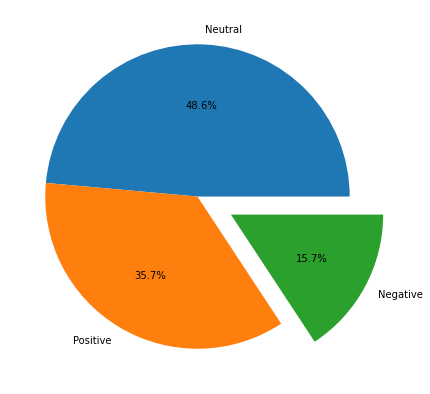

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels=tb_counts.index, explode=(0,0,0.25), autopct='%1.1f%%', shadow=False)

In [29]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vaderSentimentAnalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

final_data['Vader Sentiment'] = final_data['lemma'].apply(vaderSentimentAnalysis)
final_data.head(20)

,lemma,Subjectivity,Polarity,TextBlob,Vader Sentiment
0,nearly two third ransomware victim pay ranso...,0.129167,0.006250,Positive,0.1027
1,nearly two third ransomware victim pay ranso...,0.129167,0.006250,Positive,-0.2500
2,nearly two third ransomware victim pay ranso...,0.219444,-0.054167,Negative,-0.0258
3,nearly two third ransomware victim pay ranso...,0.219444,-0.054167,Negative,-0.0258
4,cyber security warning effective countermeas...,0.800000,0.600000,Positive,0.2263
5,nearly two third ransomware victim pay ranso...,0.129167,0.006250,Positive,-0.3612
6,open system hire alaska may cpo infosec info...,0.500000,0.000000,Neutral,0.0000
7,threatconnect appoints balaji yelamanchili c...,0.000000,0.000000,Neutral,0.0000
8,idiq name bryan sullivan chief operating fin...,0.000000,0.000000,Neutral,0.0000
9,nearly two third ransomware victim pay ranso...,0.129167,0.006250,Positive,-0.2500


In [30]:
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    if compound <= -0.5:
        return 'Negative'
    else:
        return 'Neutral'
    
final_data['vaderSentiment'] = final_data['Vader Sentiment'].apply(vader_analysis)
final_data.head(20)

,lemma,Subjectivity,Polarity,TextBlob,Vader Sentiment,vaderSentiment
0,nearly two third ransomware victim pay ranso...,0.129167,0.006250,Positive,0.1027,Neutral
1,nearly two third ransomware victim pay ranso...,0.129167,0.006250,Positive,-0.2500,Neutral
2,nearly two third ransomware victim pay ranso...,0.219444,-0.054167,Negative,-0.0258,Neutral
3,nearly two third ransomware victim pay ranso...,0.219444,-0.054167,Negative,-0.0258,Neutral
4,cyber security warning effective countermeas...,0.800000,0.600000,Positive,0.2263,Neutral
5,nearly two third ransomware victim pay ranso...,0.129167,0.006250,Positive,-0.3612,Neutral
6,open system hire alaska may cpo infosec info...,0.500000,0.000000,Neutral,0.0000,Neutral
7,threatconnect appoints balaji yelamanchili c...,0.000000,0.000000,Neutral,0.0000,Neutral
8,idiq name bryan sullivan chief operating fin...,0.000000,0.000000,Neutral,0.0000,Neutral
9,nearly two third ransomware victim pay ranso...,0.129167,0.006250,Positive,-0.2500,Neutral


In [32]:
vader_counts = final_data['vaderSentiment'].value_counts()
vader_counts

Neutral     692
Negative    187
Positive    138
Name: vaderSentiment, dtype: int64

([<matplotlib.patches.Wedge at 0x2869a0e5550>,
 [Text(-0.5906712162810641, 0.9279587890941323, 'Neutral'),
  Text(0.1540996519271045, -1.0891525592293971, 'Negative'),
  Text(1.2291815775249832, -0.5582227597233862, 'Positive')],
 [Text(-0.32218429978967134, 0.5061593395058903, '68.0%'),
  Text(0.08405435559660246, -0.5940832141251257, '18.4%'),
  Text(0.7739291414046191, -0.35147358945546536, '13.6%')])

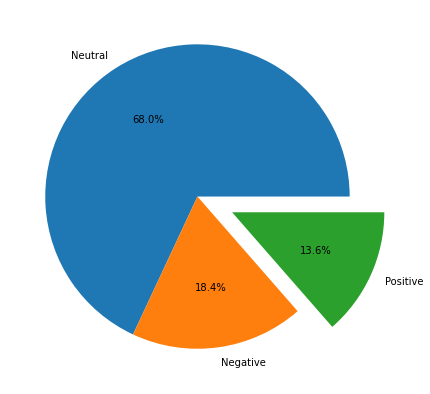

In [33]:
plt.figure(figsize=(10, 7))
plt.pie(vader_counts.values, labels=vader_counts.index, explode=(0,0,0.25), autopct='%1.1f%%', shadow=False)